In [1]:
import obspy
from obspy.signal.filter import envelope
from obspy.clients.fdsn import Client

import h5py
import numpy as np
import torch
import copy
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm
import scipy as sc

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchviz import make_dot



### Read data

In [2]:
# Extract the duration values from CSV file
cat_earthquake_good = pd.read_csv('dur_original_and_strechted.csv')
durations = cat_earthquake_good.durations_peak_amp.to_numpy()
print(durations.shape)
print(durations[0:6])

(4000,)
[11.28       13.15043045  5.94       10.5838707  15.46       21.28456624]


In [3]:
# Read the waveform data downsampled to 20 Hz for mixed waveforms
with h5py.File('mixed_signal_1min_norm_original_and_strtch_shf.h5', 'r') as f:
    mixed_wave = f['quake'][:] # Add this pair of brakets to extract only the np array
    print(mixed_wave.shape)

(4000, 1, 1200)


In [4]:
data = mixed_wave
target = durations
print(mixed_wave.shape)
print(target.shape)

(4000, 1, 1200)
(4000,)


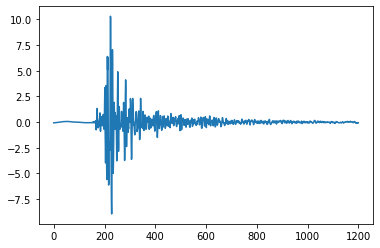

In [9]:
plt.plot(data[0,:,:].T)

In [198]:
data = mixed_wave
target = durations
print(mixed_wave.shape)
print(target.shape)

(4000, 1, 1200)
(4000,)


In [10]:
# train-test split of the normalized dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape)
print(y_train.shape)
print(X_train[1,0, 0:20])

torch.Size([3200, 1, 1200])
torch.Size([3200])
tensor([1.2666, 1.3638, 1.4788, 1.5539, 1.5875, 1.6361, 1.6831, 1.7024, 1.7320,
        1.7459, 1.7317, 1.7325, 1.7190, 1.6797, 1.6217, 1.5566, 1.4900, 1.4013,
        1.3097, 1.2012])


In [200]:
model4 = nn.Sequential(
    nn.Conv1d(1, 8, 128, stride=1, padding='same'),
    nn.BatchNorm1d(8),
    nn.ReLU(),
#     nn.Dropout(p=0.2),
    
    nn.Conv1d(8, 8, 64, stride=1, padding='same'),
    nn.BatchNorm1d(8),
    nn.ReLU(),
#     nn.Dropout(p=0.2),
    
    nn.Conv1d(8, 16, 33, stride=2, padding=16),
    nn.BatchNorm1d(16),
    nn.ReLU(),
#     nn.Dropout(p=0.2),
    
    nn.Conv1d(16, 32, 16, stride=1, padding='same'),
    nn.BatchNorm1d(32),
    nn.ReLU(),
#     nn.Dropout(p=0.2),
    
    nn.Conv1d(32, 32, 8, stride=1, padding='same'),
    nn.BatchNorm1d(32),
    nn.ReLU(),

    nn.Flatten(1),
    nn.Linear(19200, 1000),
    nn.ReLU(),
    nn.Linear(1000, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.ReLU(),
    nn.Linear(10, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.ReLU()
 
)

[1,     1] loss: 23.414107
[1,   501] loss: 99.992107
[1,  1001] loss: 132.996219
[1,  1501] loss: 116.706239
[1,  2001] loss: 98.705070
[1,  2501] loss: 105.675325
[1,  3001] loss: 135.035992
[2,     1] loss: 16.063341
[2,   501] loss: 72.581624
[2,  1001] loss: 105.020732
[2,  1501] loss: 98.768033
[2,  2001] loss: 90.591359
[2,  2501] loss: 100.397812
[2,  3001] loss: 132.820518
[3,     1] loss: 15.265558
[3,   501] loss: 71.459281
[3,  1001] loss: 103.883331
[3,  1501] loss: 97.980074
[3,  2001] loss: 90.168495
[3,  2501] loss: 99.872069
[3,  3001] loss: 132.401396
[4,     1] loss: 15.145444
[4,   501] loss: 71.144870
[4,  1001] loss: 103.419865
[4,  1501] loss: 97.783853
[4,  2001] loss: 89.926672
[4,  2501] loss: 99.707777
[4,  3001] loss: 132.159486
[5,     1] loss: 15.090034
[5,   501] loss: 70.993633
[5,  1001] loss: 103.244315
[5,  1501] loss: 97.694135
[5,  2001] loss: 89.793898
[5,  2501] loss: 99.626474
[5,  3001] loss: 132.080046
[6,     1] loss: 15.059833
[6,   501] loss

[42,  2501] loss: 131.856146
[42,  3001] loss: 175.678214
[43,     1] loss: 20.146515
[43,   501] loss: 93.726493
[43,  1001] loss: 137.083800
[43,  1501] loss: 129.743889
[43,  2001] loss: 118.871428
[43,  2501] loss: 131.710410
[43,  3001] loss: 175.290521
[44,     1] loss: 20.129590
[44,   501] loss: 93.572885
[44,  1001] loss: 136.432092
[44,  1501] loss: 129.616527
[44,  2001] loss: 119.035251
[44,  2501] loss: 131.715842
[44,  3001] loss: 175.504846
[45,     1] loss: 20.060077
[45,   501] loss: 93.460246
[45,  1001] loss: 136.299619
[45,  1501] loss: 129.607326
[45,  2001] loss: 118.818526
[45,  2501] loss: 131.663449
[45,  3001] loss: 175.190976
[46,     1] loss: 20.051645
[46,   501] loss: 93.413634
[46,  1001] loss: 136.239902
[46,  1501] loss: 129.569336
[46,  2001] loss: 118.732564
[46,  2501] loss: 131.568037
[46,  3001] loss: 175.041925
[47,     1] loss: 20.033742
[47,   501] loss: 93.378229
[47,  1001] loss: 136.154695
[47,  1501] loss: 129.552313
[47,  2001] loss: 118.61

[83,  2001] loss: 156.261665
[83,  2501] loss: 175.366577
[83,  3001] loss: 231.672372
[84,     1] loss: 27.090714
[84,   501] loss: 124.038004
[84,  1001] loss: 185.978674
[84,  1501] loss: 171.197125
[84,  2001] loss: 159.292712
[84,  2501] loss: 174.065898
[84,  3001] loss: 235.691132
[85,     1] loss: 26.330560
[85,   501] loss: 123.391061
[85,  1001] loss: 183.227621
[85,  1501] loss: 171.228030
[85,  2001] loss: 157.587178
[85,  2501] loss: 173.805417
[85,  3001] loss: 234.483490
[86,     1] loss: 26.304288
[86,   501] loss: 122.560048
[86,  1001] loss: 179.122897
[86,  1501] loss: 171.557465
[86,  2001] loss: 155.813203
[86,  2501] loss: 172.397260
[86,  3001] loss: 230.745404
[87,     1] loss: 26.290158
[87,   501] loss: 122.751048
[87,  1001] loss: 178.949823
[87,  1501] loss: 171.587756
[87,  2001] loss: 155.649324
[87,  2501] loss: 172.419049
[87,  3001] loss: 230.354703
[88,     1] loss: 26.269614
[88,   501] loss: 122.692305
[88,  1001] loss: 179.335150
[88,  1501] loss: 1

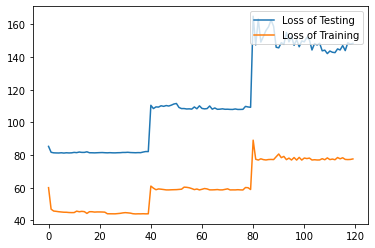

In [234]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 120  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    
    if epoch <40:
        # Define a loss function that includes a penalty
        def custom_mse(y_pred, y_true, epoch):
            mse = torch.mean(torch.square(y_true - y_pred))
            penalty = torch.mean(torch.square(torch.std(y_true)
                                             - torch.std(y_pred)))
            weighting_of_penalty = 0

            return mse +  weighting_of_penalty*penalty
        
        
    elif epoch < 80:
        # Define a loss function that includes a penalty
        def custom_mse(y_pred, y_true, epoch):
            mse = torch.mean(torch.square(y_true - y_pred))
            penalty = torch.mean(torch.square(torch.std(y_true)
                                             - torch.std(y_pred)))
            weighting_of_penalty = 0.5

            return mse +  weighting_of_penalty*penalty
        
    else:
         # Define a loss function that includes a penalty
        def custom_mse(y_pred, y_true, epoch):
            mse = torch.mean(torch.square(y_true - y_pred))
            penalty = torch.mean(torch.square(torch.std(y_true)
                                             - torch.std(y_pred)))
            weighting_of_penalty = 3

            return mse +  weighting_of_penalty*penalty
        
    
    
    # Define the loss function and the optimizer
    import torch.optim as optim

    loss_fn = custom_mse  # mean square error
    optimizer = optim.Adam(model4.parameters(), lr=0.0001)    
    
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Duration of the events in Test set')

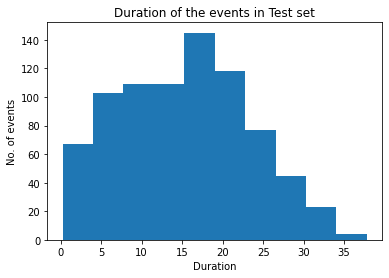

In [246]:
# Test the trained model
model4.eval()
with torch.no_grad():
    y_pred_test = model4(X_test)
    
# print(y_pred_test.detach().numpy()[500:520])
plt.hist(y_pred_test.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

Text(0.5, 0, 'Actual Duration (s)')

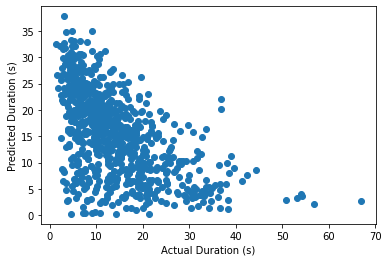

In [242]:
# Plot the true durations vs. predicted durations for the testing data set
plt.scatter(y_test.detach().numpy(), y_pred_test.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')

[[12.698563  ]
 [ 5.966376  ]
 [ 0.31162193]
 [15.262654  ]
 [ 8.7689085 ]
 [18.640781  ]
 [15.912742  ]
 [19.603264  ]
 [15.632055  ]
 [ 7.6032395 ]
 [17.169556  ]
 [ 0.23680484]
 [10.0996065 ]
 [ 8.331325  ]
 [ 9.352052  ]
 [10.316567  ]
 [21.010649  ]
 [33.17371   ]
 [14.431207  ]
 [12.304509  ]]


Text(0.5, 1.0, 'Duration of the events in Test set')

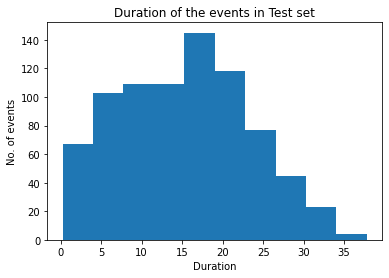

In [243]:
# Test the trained model
model4.eval()
with torch.no_grad():
    y_pred_test = model4(X_test)
    
print(y_pred_test.detach().numpy()[500:520])
plt.hist(y_pred_test.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

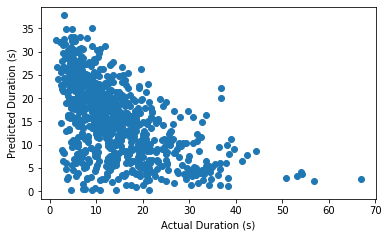

In [245]:
# Plot the true durations vs. predicted durations for the testing data set
plt.scatter(y_test.detach().numpy(), y_pred_test.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')
plt.gca().set_aspect('equal')

### Train when weighting_of_penalty = 0

In [201]:
# Define a loss function that includes a penalty
def custom_mse(y_pred, y_true, epoch):
    mse = torch.mean(torch.square(y_true - y_pred))
    penalty = torch.mean(torch.square(torch.std(y_true)
                                     - torch.std(y_pred)))
    
    weighting_of_penalty = 0
    
    return mse +  weighting_of_penalty*penalty

In [202]:
import torch.optim as optim

loss_fn = custom_mse  # mean square error
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

[1,     1] loss: 60.013879
[1,   501] loss: 243.692447
[1,  1001] loss: 273.882849
[1,  1501] loss: 224.707526
[1,  2001] loss: 170.900790
[1,  2501] loss: 133.896428
[1,  3001] loss: 142.137129
[2,     1] loss: 15.289334
[2,   501] loss: 80.746428
[2,  1001] loss: 105.815346
[2,  1501] loss: 98.060507
[2,  2001] loss: 89.919313
[2,  2501] loss: 100.245274
[2,  3001] loss: 132.302266
[3,     1] loss: 15.116850
[3,   501] loss: 72.956847
[3,  1001] loss: 102.211816
[3,  1501] loss: 97.516827
[3,  2001] loss: 89.590904
[3,  2501] loss: 99.823347
[3,  3001] loss: 131.896782
[4,     1] loss: 15.144370
[4,   501] loss: 72.289616
[4,  1001] loss: 102.095866
[4,  1501] loss: 97.468565
[4,  2001] loss: 89.571873
[4,  2501] loss: 99.788762
[4,  3001] loss: 131.892055
[5,     1] loss: 15.133665
[5,   501] loss: 72.317770
[5,  1001] loss: 102.057729
[5,  1501] loss: 97.442320
[5,  2001] loss: 89.563103
[5,  2501] loss: 99.763528
[5,  3001] loss: 131.796237
[6,     1] loss: 15.110571
[6,   501] lo

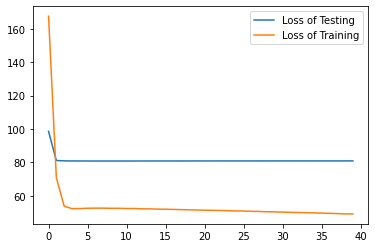

In [203]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 40  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 0, 'Actual Duration (s)')

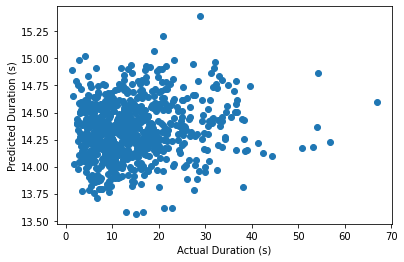

In [204]:
# Plot the true durations vs. predicted durations
plt.scatter(y_test.detach().numpy(), y_pred.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')

Text(0.5, 1.0, 'Duration of the events in Test set')

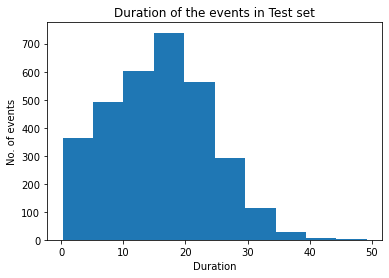

In [237]:
# Test the trained model with the training data set
model4.eval()
with torch.no_grad():
    y_pred_train = model4(X_train)
    
# print(y_pred_train.detach().numpy()[500:520])
plt.hist(y_pred_train.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

Text(0.5, 0, 'Actual Duration (s)')

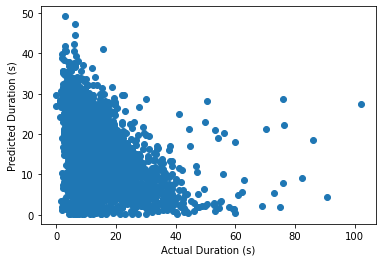

In [238]:
# Plot the true durations vs. predicted durations for the training data set
plt.scatter(y_train.detach().numpy(), y_pred_train.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')

### Train when weighting_of_penalty = 0.5

In [207]:
# Define a loss function that includes a penalty
def custom_mse(y_pred, y_true, epoch):
    mse = torch.mean(torch.square(y_true - y_pred))
    penalty = torch.mean(torch.square(torch.std(y_true)
                                     - torch.std(y_pred)))
    
    weighting_of_penalty = 0.5
    
    return mse +  weighting_of_penalty*penalty

In [208]:
import torch.optim as optim

loss_fn = custom_mse  # mean square error
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

In [247]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 40  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

[1,     1] loss: 26.285724
[1,   501] loss: 123.180690


KeyboardInterrupt: 

Text(0.5, 1.0, 'Duration of the events in Test set')

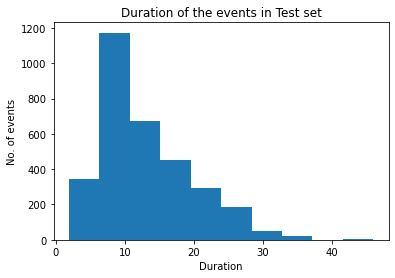

In [221]:
# Test the trained model with the training data set
model4.eval()
with torch.no_grad():
    y_pred_train = model4(X_train)
    
# print(y_pred_train.detach().numpy()[500:520])
plt.hist(y_pred_train.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

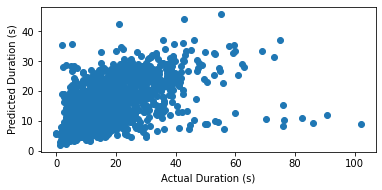

In [222]:
# Plot the true durations vs. predicted durations for the training data set
plt.scatter(y_train.detach().numpy(), y_pred_train.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')
plt.gca().set_aspect('equal')

### Train when weighting_of_penalty = 3

In [226]:
# Define a loss function that includes a penalty
def custom_mse(y_pred, y_true, epoch):
    mse = torch.mean(torch.square(y_true - y_pred))
    penalty = torch.mean(torch.square(torch.std(y_true)
                                     - torch.std(y_pred)))
    
    weighting_of_penalty = 3
    
    return mse +  weighting_of_penalty*penalty

In [227]:
import torch.optim as optim

loss_fn = custom_mse  # mean square error
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

[1,     1] loss: 26.279330
[1,   501] loss: 122.875658
[1,  1001] loss: 178.525668
[1,  1501] loss: 170.343423
[1,  2001] loss: 155.959811
[1,  2501] loss: 171.890489
[1,  3001] loss: 227.209653
[2,     1] loss: 26.325412
[2,   501] loss: 123.087025
[2,  1001] loss: 178.718051
[2,  1501] loss: 170.106949
[2,  2001] loss: 155.316309
[2,  2501] loss: 171.903828
[2,  3001] loss: 227.299213
[3,     1] loss: 26.282971
[3,   501] loss: 122.656216
[3,  1001] loss: 178.246780
[3,  1501] loss: 170.009790
[3,  2001] loss: 155.418358
[3,  2501] loss: 171.679724
[3,  3001] loss: 227.232468
[4,     1] loss: 26.307983
[4,   501] loss: 122.477397
[4,  1001] loss: 178.262082
[4,  1501] loss: 170.096811
[4,  2001] loss: 155.611069
[4,  2501] loss: 171.669803
[4,  3001] loss: 227.280780
[5,     1] loss: 26.312689
[5,   501] loss: 122.477490
[5,  1001] loss: 178.232724
[5,  1501] loss: 170.052979
[5,  2001] loss: 155.637679
[5,  2501] loss: 171.782486
[5,  3001] loss: 227.420123
[6,     1] loss: 26.32349

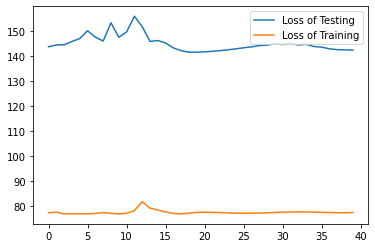

In [228]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 40  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

[[ 7.1882043]
 [19.002525 ]
 [18.769548 ]
 [15.854943 ]
 [ 5.180455 ]
 [ 8.38736  ]
 [16.190733 ]
 [17.232296 ]
 [10.540846 ]
 [16.763803 ]
 [18.636381 ]
 [ 8.754522 ]
 [ 7.4195266]
 [22.438797 ]
 [ 5.0817227]
 [20.9144   ]
 [ 4.9578457]
 [10.489219 ]
 [ 9.764242 ]
 [10.468283 ]]


Text(0.5, 1.0, 'Duration of the events in Test set')

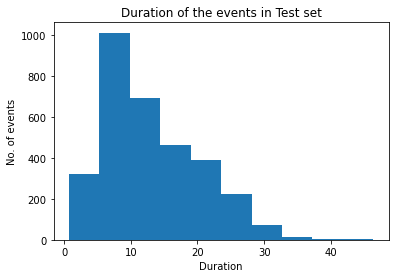

In [229]:
# Test the trained model with the training data set
model4.eval()
with torch.no_grad():
    y_pred_train = model4(X_train)
    
print(y_pred_train.detach().numpy()[500:520])
plt.hist(y_pred_train.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

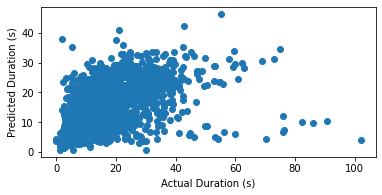

In [230]:
# Plot the true durations vs. predicted durations for the training data set
plt.scatter(y_train.detach().numpy(), y_pred_train.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')
plt.gca().set_aspect('equal')

[[ 6.5497437]
 [20.484636 ]
 [ 9.795163 ]
 [20.306932 ]
 [ 8.667727 ]
 [ 6.9426823]
 [ 9.445353 ]
 [ 3.7621698]
 [ 6.091772 ]
 [ 5.6875815]]


Text(0.5, 1.0, 'Duration of the events in Test set')

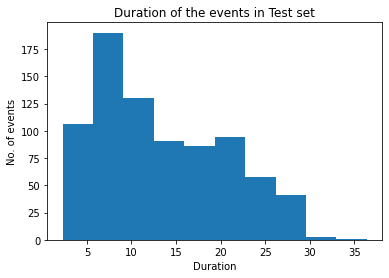

In [231]:
# Test the trained model
model4.eval()
with torch.no_grad():
    y_pred_test = model4(X_test)
    
print(y_pred_test.detach().numpy()[10:20])
plt.hist(y_pred_test.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

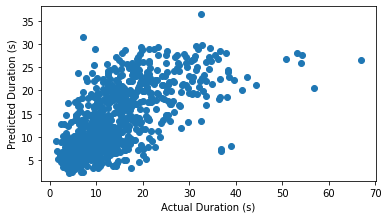

In [233]:
# Plot the true durations vs. predicted durations for the testing data set
plt.scatter(y_test.detach().numpy(), y_pred_test.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')
plt.gca().set_aspect('equal')

In [125]:
X_test.shape

torch.Size([800, 1, 1200])

### Train when weighting_of_penalty = 6

In [111]:
# Define a loss function that includes a penalty
def custom_mse(y_pred, y_true, epoch):
    mse = torch.mean(torch.square(y_true - y_pred))
    penalty = torch.mean(torch.square(torch.std(y_true)
                                     - torch.std(y_pred)))
    
    weighting_of_penalty = 6
    
    return mse +  weighting_of_penalty*penalty

In [112]:
import torch.optim as optim

loss_fn = custom_mse  # mean square error
optimizer = optim.Adam(model4.parameters(), lr=0.001)

[1,     1] loss: 16.434604
[1,   501] loss: 83.514833
[1,  1001] loss: 87.854803
[1,  1501] loss: 77.886701
[1,  2001] loss: 70.615271
[1,  2501] loss: 74.859770
[1,  3001] loss: 73.838114
[2,     1] loss: 17.196187
[2,   501] loss: 86.178965
[2,  1001] loss: 87.623783
[2,  1501] loss: 75.968728
[2,  2001] loss: 69.398781
[2,  2501] loss: 76.716225
[2,  3001] loss: 74.308603
[3,     1] loss: 16.334081
[3,   501] loss: 82.005045
[3,  1001] loss: 87.193032
[3,  1501] loss: 75.427165
[3,  2001] loss: 69.246611
[3,  2501] loss: 75.340356
[3,  3001] loss: 76.579470
[4,     1] loss: 17.163379
[4,   501] loss: 85.702069
[4,  1001] loss: 90.406532
[4,  1501] loss: 78.928517
[4,  2001] loss: 70.045654
[4,  2501] loss: 76.060441
[4,  3001] loss: 77.212283
[5,     1] loss: 16.459418
[5,   501] loss: 81.885023
[5,  1001] loss: 87.594120
[5,  1501] loss: 76.898310
[5,  2001] loss: 71.036180
[5,  2501] loss: 75.382467
[5,  3001] loss: 74.432684
[6,     1] loss: 16.958176
[6,   501] loss: 84.013243
[

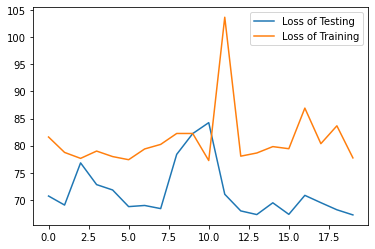

In [113]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 20  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

[[16.511099 ]
 [ 2.006757 ]
 [17.314117 ]
 [ 5.2095137]
 [15.19075  ]
 [15.094934 ]
 [16.300991 ]
 [12.561341 ]
 [19.288477 ]
 [17.43257  ]]


Text(0.5, 1.0, 'Duration of the events in Test set')

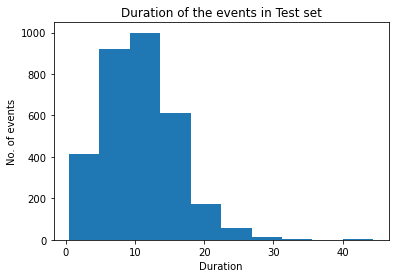

In [114]:
# Test the trained model with the training data set
model4.eval()
with torch.no_grad():
    y_pred_train = model4(X_train)
    
print(y_pred_train.detach().numpy()[500:510])
plt.hist(y_pred_train.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

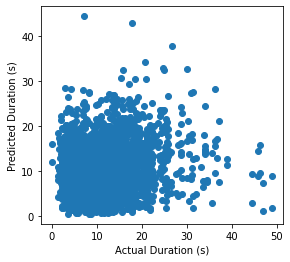

In [116]:
# Plot the true durations vs. predicted durations for the training data set
plt.scatter(y_train.detach().numpy(), y_pred_train.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')
plt.gca().set_aspect('equal')

### Train when weighting_of_penalty = 12

In [49]:
# Define a loss function that includes a penalty
def custom_mse(y_pred, y_true, epoch):
    mse = torch.mean(torch.square(y_true - y_pred))
    penalty = torch.mean(torch.square(torch.std(y_true)
                                     - torch.std(y_pred)))
    
    weighting_of_penalty = 12
    
    return mse +  weighting_of_penalty*penalty

In [50]:
import torch.optim as optim

loss_fn = custom_mse  # mean square error
optimizer = optim.Adam(model4.parameters(), lr=0.001)

[1,     1] loss: 16.497409
[1,   501] loss: 95.334425
[1,  1001] loss: 78.047629
[1,  1501] loss: 74.425069
[2,     1] loss: 17.526715
[2,   501] loss: 94.925174
[2,  1001] loss: 78.199350
[2,  1501] loss: 76.740509
[3,     1] loss: 15.855042
[3,   501] loss: 90.787372
[3,  1001] loss: 75.947830
[3,  1501] loss: 73.430022
[4,     1] loss: 16.278246
[4,   501] loss: 90.586026
[4,  1001] loss: 74.048598
[4,  1501] loss: 72.783279
[5,     1] loss: 15.911504
[5,   501] loss: 88.669436
[5,  1001] loss: 74.176773
[5,  1501] loss: 72.853445
[6,     1] loss: 15.760429
[6,   501] loss: 88.852263
[6,  1001] loss: 74.812439
[6,  1501] loss: 73.078122
[7,     1] loss: 16.325723
[7,   501] loss: 89.119690
[7,  1001] loss: 76.122057
[7,  1501] loss: 74.148024
[8,     1] loss: 17.545613
[8,   501] loss: 91.957964
[8,  1001] loss: 75.784599
[8,  1501] loss: 72.867242
[9,     1] loss: 16.062579
[9,   501] loss: 89.712975
[9,  1001] loss: 73.871861
[9,  1501] loss: 74.948141
[10,     1] loss: 17.395380


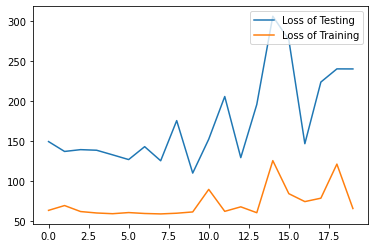

In [51]:
random_seed = 11 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# parameters for training
n_epochs = 20  # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# For plotting MSE
best_mse = np.inf   # init to infinity
best_weights = None
history_train = []
history_test = []
duration_pred_train = []
duration_pred_test = np.zeros((3,800,1))


# training loop
for epoch in range(n_epochs):
    model4.train()
    running_loss = 0.0
#     batch_loss = []
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model4(X_batch)
            loss = loss_fn(y_pred, y_batch, epoch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            
#             batch_loss.append(loss)
            
            running_loss += loss.item()
            if start % 500 == 0:    # print every 10 batches
                print(f'[{epoch + 1}, {start + 1:5d}] loss: {running_loss / 5:.6f}')
                running_loss = 0.0   
            
#             Append the loss for the second batch in every epoch in history1
            if start == 500:
                history_train.append(float(loss))
            
#             print(torch.std(y_batch), torch.std(y_pred), 'This is the Std')

#             if n_epochs == 15 and start == 2000:
#                 duration_pred_test.append(y_pred)
                
#     print(f'The average loss of this epoch:{tensor.detach.np.mean(batch_loss):.2f}')
    
#     evaluate accuracy at end of each epoch
    model4.eval()
    y_pred = model4(X_test)
    mse = loss_fn(y_pred, y_test, epoch)
    mse = float(mse)
    history_test.append(mse)

    if mse < best_mse:
#         best_mse = mse
        best_weights = copy.deepcopy(model4.state_dict())
    # Append all the predictions in the first three epochs
    if epoch < 3 :
        duration_pred_test[epoch,:] = y_pred.detach().numpy()
        
# restore model and return best accuracy
# model4.load_state_dict(best_weights)

# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot the history of loss of the first batch in every epoch 
plt.plot(history_test, label='Loss of Testing')
plt.plot(history_train, label='Loss of Training')
plt.legend(loc='upper right')
plt.show()

[[10.6474285]
 [10.642629 ]
 [10.634488 ]
 [10.655556 ]
 [10.653209 ]
 [10.9717655]
 [10.644999 ]
 [ 0.8987955]
 [10.646343 ]
 [10.642269 ]]


Text(0.5, 1.0, 'Duration of the events in Test set')

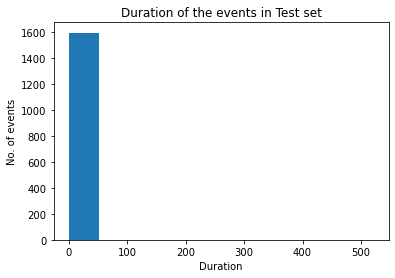

In [53]:
# Test the trained model with the training data set
model4.eval()
with torch.no_grad():
    y_pred_train = model4(X_train)
    
print(y_pred_train.detach().numpy()[500:510])
plt.hist(y_pred_train.detach().numpy())
plt.xlabel('Duration')
plt.ylabel('No. of events')
plt.title('Duration of the events in Test set')

Text(0.5, 0, 'Actual Duration (s)')

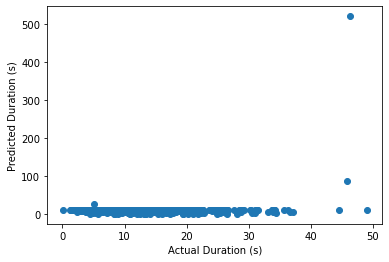

In [54]:
# Plot the true durations vs. predicted durations for the training data set
plt.scatter(y_train.detach().numpy(), y_pred_train.detach().numpy())
plt.ylabel('Predicted Duration (s)')
plt.xlabel('Actual Duration (s)')